## Примеры лабораторной работы

#### Задание 4.1. Изменить размер изображения.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def img_print(original, modified):
    pose = [121, 122]
    header = ["Original", "Modified"]
    img = [original, modified]
    i = 0
    while i < 2:
        plt.subplot(pose[i])
        plt.title(header[i])
        plt.imshow(img[i])
        i += 1
    return 0

#### Первый способ изменения размера задается в процентах

Resized Dimensions :  (368, 368, 3)


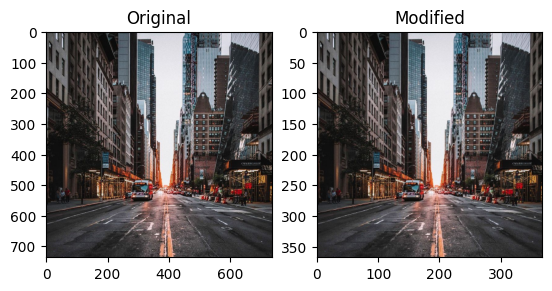

In [10]:
img = cv2.imread('city.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
scale_percent = 50  # процент изменения
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
print('Resized Dimensions : ', resized.shape)
img_print(img, resized);

#### Второй способ изменения размера задается вручную

Original Dimensions :  (736, 736, 3)
Resized Dimensions :  (71, 58, 3)


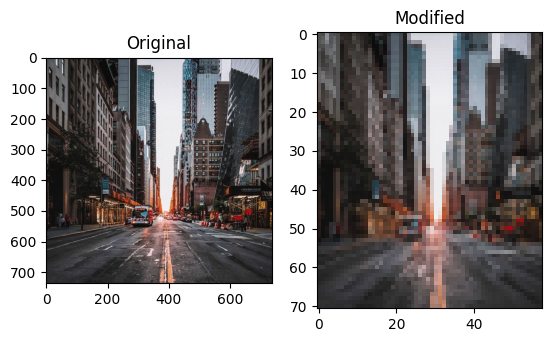

In [11]:
print('Original Dimensions : ',img.shape)
width = 58
height = 71
dim1 = (width, height)

# resize image
resized1 = cv2.resize(img, dim1, interpolation=cv2.INTER_AREA)
print('Resized Dimensions : ', resized1.shape)
img_print(img, resized1);

#### Третий способ: задается коэффициентом масштабирования

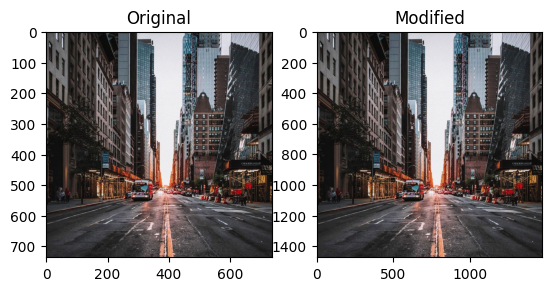

In [12]:
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
img_print(img, res);

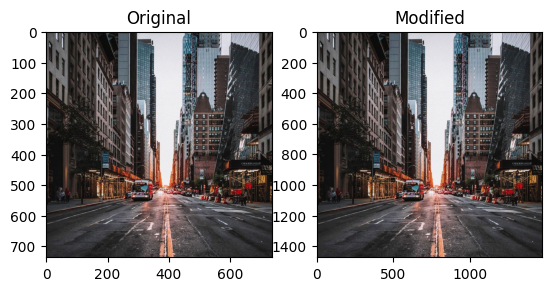

In [14]:
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
img_print(img, res);

#### Задание 4.2. Определить размер изображения и сдвинуть изображение на 100 столбцов и 50 строк.

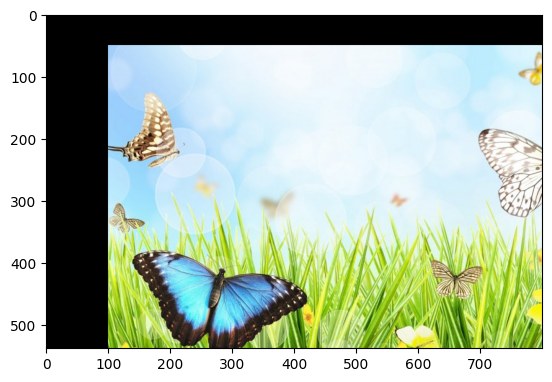

In [21]:
img2 = cv2.imread('pic.jpg',1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
rows,cols,colors = img2.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img2,M,(cols,rows))
plt.imshow(dst);

#### Задание 4.3. Определить размер изображения, его центр и повернуть его на 90 градусов.

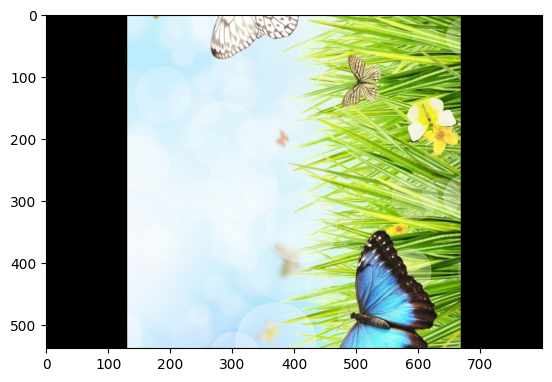

In [27]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img2,M,(cols,rows))
plt.imshow(dst);

#### Задание 4.4. Определить размер изображения, задать 3 точки, изменить их координаты и провести аффинное преобразование всего изображения по этим точкам.

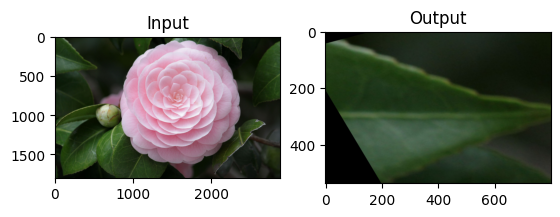

In [31]:
img3 = cv2.imread('flower.jpeg',1)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img3,M,(cols,rows))

plt.subplot(121),plt.imshow(img3),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Задание 4.5. Провести охват изображения в прямоугольник, повернутый так, чтобы площадь этого прямоугольника была минимальной

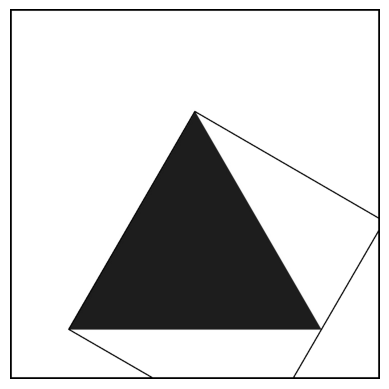

In [39]:
img4 = cv2.imread('geo.jpeg',0)
ret, thresh = cv2.threshold(img4, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)

cnt = contours[0]
rect = cv2.minAreaRect(cnt)

box = cv2.boxPoints(rect)
box = np.int_(box)

imp = cv2.drawContours(img4, [box], 0, (0, 0, 255), 2)
imp = cv2.cvtColor(imp, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imp);

#### Задание 4.6. Провести охват изображения в круг


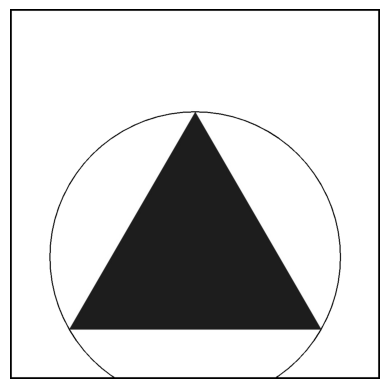

In [8]:
image = cv2.imread('geo.jpeg',0)

ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)
cnt = contours[0]
rect = cv2.minAreaRect(cnt)
(x,y),radius = cv2.minEnclosingCircle(cnt)

center = (int(x),int(y))
radius = int(radius)


image = cv2.circle(image,center,radius,(0,255,0),2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(image);

#### Задание 4.7. Провести охват изображения в эллипс, повернутый так, чтобы площадь этого эллипса была минимальной.


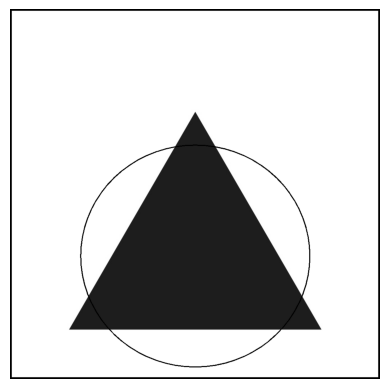

In [43]:
img5 = cv2.imread('geo.jpeg',0)

ellipse = cv2.fitEllipse(cnt)
imag = cv2.ellipse(img5,ellipse,(0,255,0),2)

imag = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imag);

#### Задание 4.8. Провести прямую линию вдоль оси симметрии изображения.


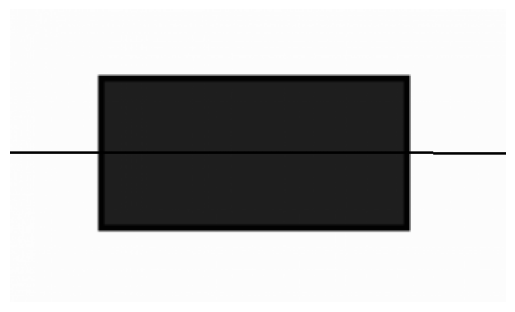

In [54]:
img6 = cv2.imread('geo2.png',0)

ret, thresh = cv2.threshold(img6, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)

cnt = contours[0]
rows,cols = inv.shape[:2]

[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)

lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)

img = cv2.line(img6,(cols-1,righty),(0,lefty),(0,255,0),2)
img = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img);

#### Задание 4.9. Нарисовать контур, охватывающий изображение, толщиной 2, вывести полученное изображение на экран.


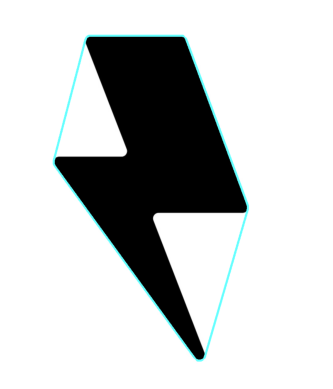

In [47]:
img7 = cv2.imread('mol.png',1)

gray = cv2.cvtColor(img7,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50,200)
contours, hierarchy= cv2.findContours(edges.copy(), 
cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    hull= cv2.convexHull(cnt)
    cv2.drawContours(img7, [hull],0,(100,255,255),4)
plt.axis('off')
plt.imshow(img7);

#### Задание 4.10. Выполнить аппроксимацию контура, полагая epsilon =1%, epsilon=5% и epsilon=10%.


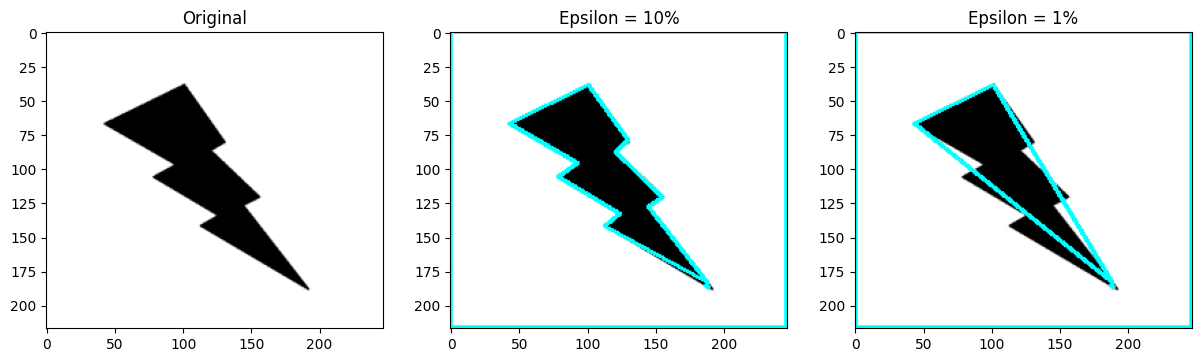

In [49]:
img = cv2.imread('mol1.png', 0)

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 2, 3)

imag = cv2.imread('mol1.png')

f = plt.figure(figsize=(20, 20))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(img, 'gray')

plt.subplot(1, 4, 2)
plt.title('Epsilon = 10%')
for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(imag, [approx], -1, (0, 255, 255), 2)
plt.imshow(imag)

plt.subplot(1, 4, 3)
plt.title('Epsilon = 1%')
imAg = cv2.imread('mol1.png')
for cnt in contours:
    epsilon = 0.1 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(imAg, [approx], 0, (0, 255, 255), 2)
plt.imshow(imAg);

plt.show();

#### Задание 4.11. Нарисовать прямоугольник в месте, где нужно вырезать фрагмент (см. рис. 3), вывести на экран фрагмент, ограниченный прямоугольником, увеличив этот фрагмент. Определить размер изображения, его центр и повернуть его на 90 градусов.


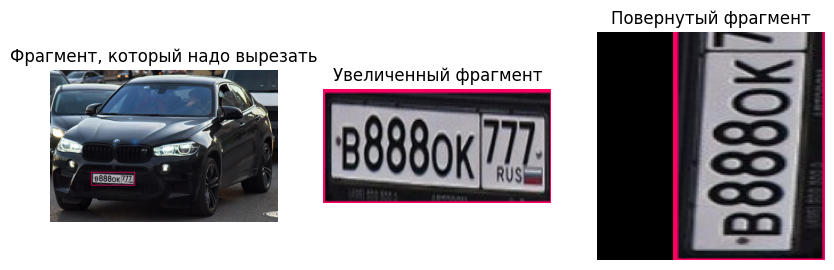

In [219]:
img8 = cv2.imread('car.jpg', 1)
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
# Рисуем прямоугольник в месте,где собираемся вырезать фрагмент. 
image = cv2.rectangle(img8, (190, 470), (390, 530), (255, 0, 100), 2)
plt.axis('off')
plt.imshow(image)
plt.title('Фрагмент, который надо вырезать')

plt.subplot(1, 3, 2)
# Выведем на экран участок изображения
crop = img8[470:530, 190:390]
# Увеличим этот фрагмент до 200х100
piece = cv2.resize(crop, (200,100), interpolation=cv2.INTER_LINEAR)
# Получим длину и ширину изображения как w и h
(h, w) = piece.shape[:2]
plt.axis('off')
plt.imshow(piece)
plt.title('Увеличенный фрагмент')

plt.subplot(1, 3, 3)
center = (w / 2, h / 2) # Получим центр изображения
# Повернем центр на 90 градусов с коэффициентом масштаба 1.0
M = cv2.getRotationMatrix2D(center, 90, 1.0) 
rotated = cv2.warpAffine(piece, M, (150, 150))
plt.axis('off')
plt.imshow(rotated)
plt.title('Повернутый фрагмент')

plt.show();